In [1]:
import os
os.chdir('../../')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2

from datasets.lost_and_found import LostAndFound
from easydict import EasyDict as edict

from tqdm.notebook import tqdm

# Config

In [9]:
laf_config = edict(
    dataset_root='/home/user/datasets/LostAndFound',
)

transforms_laf = A.Compose([
    ToTensorV2()
])

laf_dataset = LostAndFound(laf_config, transforms_laf) 

In [12]:
len(laf_dataset)

1203

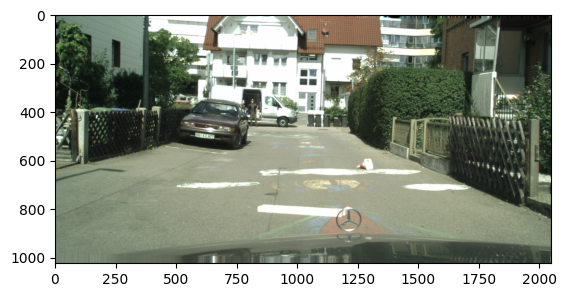

In [94]:
img, lbl = laf_dataset[873]
plt.imshow(img.permute(1, 2, 0))
plt.show()

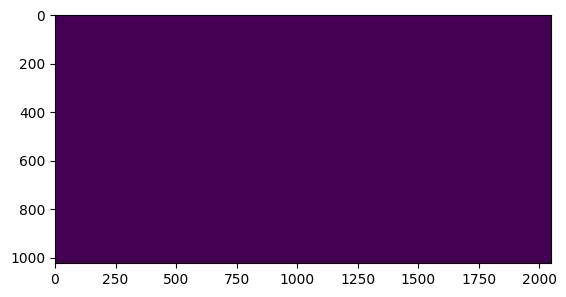

In [95]:
plt.imshow(lbl)
plt.show()

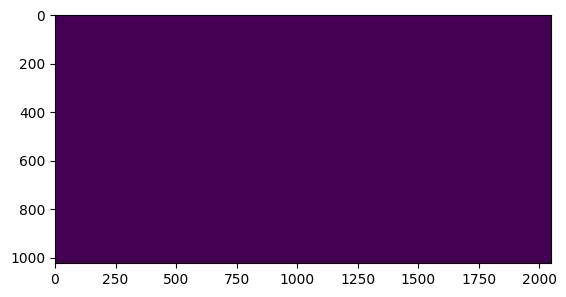

In [91]:
m = lbl.clone()
k = 1
m[lbl == k] = 1
m[lbl != k] = 0 
plt.imshow(m)
plt.show()

In [70]:
torch.unique(lbl)

tensor([  0,   1, 255])

In [73]:
laf_dataset.labels[0]

'/home/user/datasets/LostAndFound/gtCoarse/test/02_Hanns_Klemm_Str_44/02_Hanns_Klemm_Str_44_000001_000210_gtCoarse_labelTrainIds.png'

In [77]:
defects_1 = []
defects_2 = []
for i in tqdm(range(len(laf_dataset))):
    _, l = laf_dataset[i]
    u = torch.unique(l)
    if len(u) < 3:
        defects_2.append(i)
    if len(u) < 2:
        defects_1.append(i)

  0%|          | 0/1203 [00:00<?, ?it/s]

In [78]:
len(defects_1), len(defects_2)

(17, 92)

In [79]:
defects_1

[0,
 102,
 110,
 115,
 121,
 123,
 161,
 165,
 191,
 202,
 296,
 355,
 544,
 579,
 654,
 873,
 1012]

In [98]:
_ = [print(laf_dataset.images[i]) for i in defects_1]

/home/user/datasets/LostAndFound/leftImg8bit/test/02_Hanns_Klemm_Str_44/02_Hanns_Klemm_Str_44_000001_000210_leftImg8bit.png
/home/user/datasets/LostAndFound/leftImg8bit/test/02_Hanns_Klemm_Str_44/02_Hanns_Klemm_Str_44_000002_000190_leftImg8bit.png
/home/user/datasets/LostAndFound/leftImg8bit/test/02_Hanns_Klemm_Str_44/02_Hanns_Klemm_Str_44_000007_000250_leftImg8bit.png
/home/user/datasets/LostAndFound/leftImg8bit/test/02_Hanns_Klemm_Str_44/02_Hanns_Klemm_Str_44_000008_000220_leftImg8bit.png
/home/user/datasets/LostAndFound/leftImg8bit/test/02_Hanns_Klemm_Str_44/02_Hanns_Klemm_Str_44_000006_000200_leftImg8bit.png
/home/user/datasets/LostAndFound/leftImg8bit/test/02_Hanns_Klemm_Str_44/02_Hanns_Klemm_Str_44_000003_000180_leftImg8bit.png
/home/user/datasets/LostAndFound/leftImg8bit/test/02_Hanns_Klemm_Str_44/02_Hanns_Klemm_Str_44_000005_000200_leftImg8bit.png
/home/user/datasets/LostAndFound/leftImg8bit/test/02_Hanns_Klemm_Str_44/02_Hanns_Klemm_Str_44_000000_000190_leftImg8bit.png
/home/us